In [11]:
import pandas as pd
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
%matplotlib inline

In [12]:
file_in = r'D:\Projects\RO\HydroAsAService//Tijdreeksen_Oosterscheldestations.txt'

In [13]:
# read file to get column names
with open(file_in) as f:
    lines = f.readlines()[4:34]
lines = [line.rstrip('\n') for line in lines]
lines = [line.lstrip('>') for line in lines]
lines = [line.split() for line in lines]

stations = [' '.join(line[2:-1]) for line in lines]  

# add date and time column
stations.insert(0,'tijd')
stations.insert(0,'datum')

In [14]:
# parse file to pandas to get values
df = pd.read_csv(file_in, delim_whitespace=True, header=None, skiprows=34)            

# Voeg headers toe aan alle kolommen in het dataframe
df.columns = stations

# Converteer datum en tijd naar strings in pandas dataframe
df['datum'] = df.datum.apply (str)
df['tijd']  = df.tijd.apply (str)
df['tijd']  = df['tijd'].str.zfill(4)

#       Plak datum en tijd aan elkaar en converteer naar datetime object (format komt overeen met dftot)
dftot = df.datum + df.tijd
datum = pd.to_datetime(dftot, format='%Y%m%d%H%M')

# combine datetime column and place as first column
df['datetime'] = datum
df.drop('datum', 1,inplace=True)
df.drop('tijd', 1, inplace=True)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

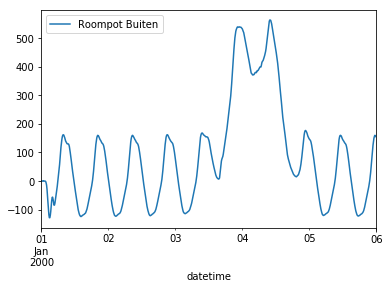

In [15]:
df.plot(x='datetime',y='Roompot Buiten')

In [6]:
# file_out = r'D:\Projects\RO\HydroAsAService//Tijdreeksen_Oosterscheldestations2.csv'
# df.to_csv(file_out, index=False)

In [16]:
# file_out = r'D:\Projects\RO\HydroAsAService//Tijdreeksen_Oosterscheldestations2.xlsx'
# df.to_excel(file_out, index=False, )

In [17]:
from altair import load_dataset
import sys
import altair
sys.path.append('..')
from altair_widgets import interact_with

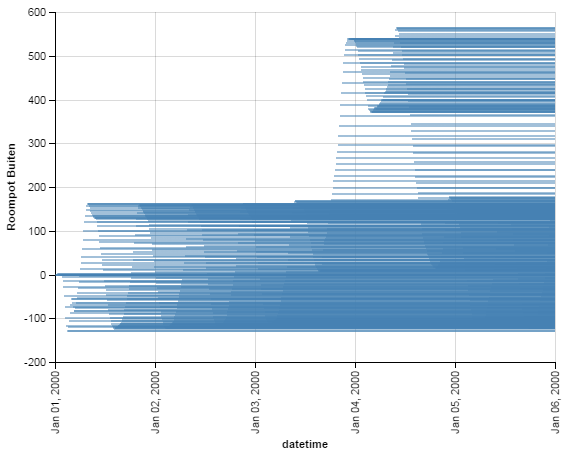

In [18]:
w = interact_with(df, ndims=3)

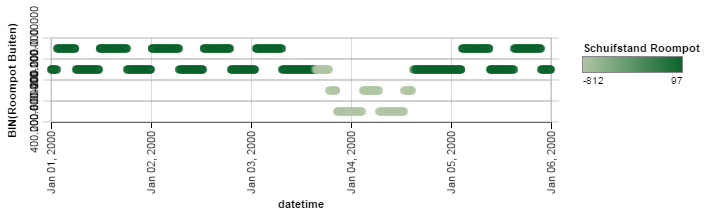

In [9]:
h = interact_with(df, ndims=3)